# Sound Speed

In [1]:
import numpy as np

#from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 14

In [4]:
import sympy
sympy.init_printing()

In [3]:
from IPython.display import Image

## Misura diretta della velocità del suono

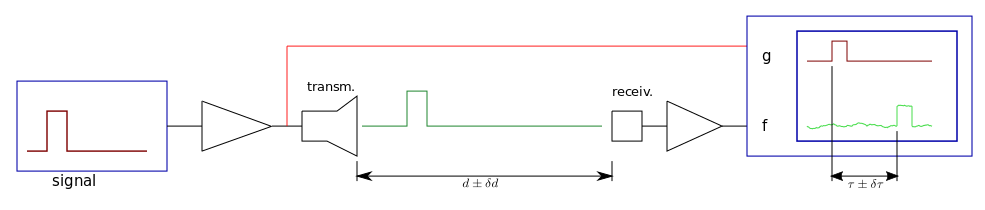

In [2]:
Image("./soundspeed.png")

Propagazione degli errori

In [36]:
d, τ = sympy.symbols('d \\tau')
s, σs = sympy.symbols('s \sigma_s')
δd, δτ = sympy.symbols('{\delta}d \delta\\tau')

In [37]:
s = d / τ
s

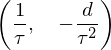

In [38]:
s.diff(d), s.diff(τ)

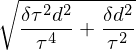

In [39]:
σs = sympy.sqrt(s.diff(d)**2 * δd**2 + s.diff(τ)**2 * δτ**2 )
σs

**Esempio numerico**

In [51]:
values = {d:24.050, δd: 0.001, τ: 0.073, δτ:0.001}

Velocità media

In [52]:
s.evalf(subs=values)

Stima errore

In [54]:
σs.evalf(subs=values)

#Analisi statistica

In [48]:
# %load ./data/soundspeed_data.py
dataset = np.array([330.793, 347.608, 340.161, 351.603, 348.962, 360.82, 
   345.618, 341.829, 334.526, 347.399, 349.509, 356.649, 347.129, 
   347.296, 344.623, 350.132, 342.273, 371.481, 339.408, 331.054, 
   345.452, 350.786, 341.711, 355.499, 342.717, 336.538, 357.517, 
   372.733, 356.538, 352.239, 323.304, 353.649, 340.606, 339.881, 
   342.915, 342.171, 338.838, 343.739, 332.648, 347.646, 344.392, 
   371.976, 352.969, 345.543, 361.907, 363.633, 333.5, 366.928, 
   347.05, 345.105, 345.676, 352.965, 343.981, 348.23, 339.477, 
   343.924, 349.683, 329.639, 336.498, 350.769, 348.734, 342.892, 
   360.221, 329.512, 351.761, 323., 337.376, 353.374, 350.114, 
   346.227, 335.053, 350.673, 360.881, 347.094, 336.263, 343.901, 
   363.496, 343.983, 338.382, 348.532, 337.751, 353.78, 339.192, 
   339.058, 353.905, 344.54, 348.03, 343.426, 347.531, 341.87, 
   341.389, 359.802, 364.441, 349.45, 351.122, 361.167, 335.262, 
   350.285, 328.241, 351.755, 352.586, 344.817, 328.925, 354.69, 
   333.851, 341.169, 331.229, 347.09, 339.64, 340.672, 345.278, 
   347.26, 321.601, 344.781, 347.201, 361.738, 348.226, 353.612, 
   353.391, 361.215, 364.371, 341.69, 334.552, 349.007, 346.119, 
   346.698, 358.854, 373.433, 335.959, 346.592, 346.21, 344.366, 
   348.383, 339.154, 347.751, 343.959, 329.895, 344.854, 349.671, 
   339.703, 343.17, 337.589, 347.439, 331.508, 349.315, 359.947, 
   357.571, 365.693, 326.418, 349.829, 335.208, 347.018, 339.867, 
   352.044, 355.842, 350.147, 336.481, 339.503, 361.543, 343.906, 
   352.917, 344.733, 347.213, 332.8, 340.673, 357.268, 325.603, 
   344.844, 345.682, 326.714, 339.32, 343.388, 371.901, 351.202, 
   344.528, 345.292, 344.089, 341.703, 353.887, 346.728, 344.715, 
   354.317, 359.252, 347.125, 341.172, 352.223, 345.84, 330.266, 
   338.685, 332.791, 340.896, 356.199, 339.411, 348.495, 337.2, 
   348.546, 360.138, 323.439, 352.281, 354.874, 358.04, 338.435, 
   335.333, 358.524, 345.365, 362.098, 343.392, 348.645, 354.481, 
   355.474, 328.19, 356.448, 349.276, 337.576, 353.573, 335.806, 
   351.113, 344.842, 356.974, 365.818, 352.844, 340.352, 343.46, 
   358.616, 348.095, 348.208, 351.043, 321.495, 341.316, 347.947, 
   342.024, 347.586, 361.495, 353.138, 341.548, 346.484, 347.155, 
   347.788, 372.464, 348.929, 341.407, 359.722, 359.885, 336.697, 
   344.336, 360.025, 332.806, 351.605, 351.244, 347.596, 364.223, 
   341.995, 344.228, 364.158, 346.247, 346.516, 343.017, 345.342, 
   335.98, 349.397, 355.693, 335.536, 359.872, 342.694, 357.685, 
   354.064, 345.729, 347.846, 342.058, 352.979, 341.973, 358.441, 
   343.626, 361.117, 356.922, 360.838, 349.574, 339.161, 357.519, 
   343.332, 357.675, 341.637, 328.33, 350.613, 348.603, 334.125, 
   338.147, 337.408, 371.756, 352.786, 343.079, 341.86, 358.611, 
   351.87, 341.142, 327.583, 353.19, 329.943, 350.381, 352.968, 
   351.195, 348.651, 359.548, 351.267, 351.867, 339.668, 345.899, 
   349.413, 343.311, 335.194, 353.049, 350.367, 343.747, 329.301, 
   339.95, 352.889, 364.465, 355.694, 349.146, 366.359, 351.826, 
   329.03, 333.492, 342.29, 349.124, 351.26, 356.571, 330.323, 
   355.601, 357.409, 358.127, 340.977, 347.204, 352.523, 320.776, 
   343.723, 348.551, 359.214, 347.814, 352.949, 360.842, 342.058, 
   351.515, 339.404, 351.291, 348.16, 340.047, 341.184, 350.17, 
   357.305, 350.031, 357.934, 353.276, 359.622, 331.558, 335.483, 
   380.174, 350.261, 339.146, 341.117, 353.023, 351.777, 340.753, 
   335.367, 354.878, 343.89, 321.495, 347.175, 334.225, 347.108, 
   351.305, 319.389, 344.785, 356.836, 348.046, 353.854, 362.315, 
   361.338, 349.369, 345.381, 352.491, 367.478, 350.008, 352.287, 
   353.202, 354.687, 350.143, 351.87, 347.256, 334.494, 341.95, 
   326.729, 343.487, 370.544, 333.996, 361.234, 338.92, 342.956, 
   350.919, 330.509])


In [47]:
n = len(dataset)

NameError: name 'np' is not defined